# Compare EDS and EELS Spectra from Cr$_2$O$_3$

In [32]:
# Install and import packages
%pip install -q numpy matplotlib
%pip install -q ipympl hyperspy[gui-jupyter]
%pip install -q rosettasciio

In [3]:
%matplotlib widget

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
from rsciio import msa

In [9]:
#eds = msa.file_reader("MCsim-50nmFilm-Cr2O3-5.22gcm-3-30keV.msa")
#eels_cl = msa.file_reader("eelsdb_Cr2O3_coreloss.msa")

## Load data

**EELS spectrum** from the EELSdb website:  
Philip Ewels, Thierry Sikora, Virginie Serin, Chris P. Ewels and Luc Lajaunie. "A Complete Overhaul of the Electron Energy-Loss Spectroscopy and X-Ray Absorption Spectroscopy Database: eelsdb.eu." Microscopy and Microanalysis, available on CJO2016. doi:10.1017/S1431927616000179.  

Spectrum from:  
SP McBride, R Brydson, Journal of Materials Science, Volume 39, page 6723-6734 (2004)

**EDS spectrum** was simulated with DTSA-II. Thin film of 50 nm thick Cr2O3 with a density of 5.22 g/cm^3. Electron beam at 30 keV with an EDS detector energy dispersion of 10 eV.

In [17]:
eds = hs.load("MCsim-50nmFilm-Cr2O3-5.22gcm-3-30keV.msa")
eels = hs.load("eelsdb_Cr2O3_coreloss.msa")

WARNING | Hyperspy | `signal_type='EDS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)


In [18]:
eds

<Signal1D, title: Noisy[MC simulation of  a 0.050 ?m film of Cr2O3] #1, dimensions: (|4096)>

In [19]:
eels

<Signal1D, title: Cr2O3_(alpha)_O_K_Rik_Brydson_158, dimensions: (|1024)>

## Plot individual spectra
Let's first check out both spectra individually.

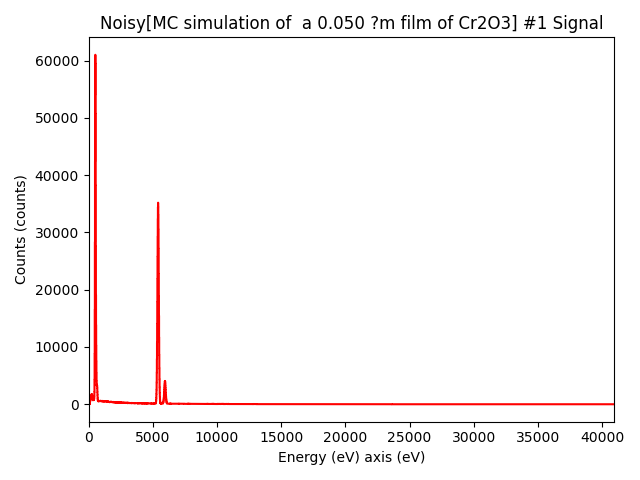

In [28]:
eds.plot()

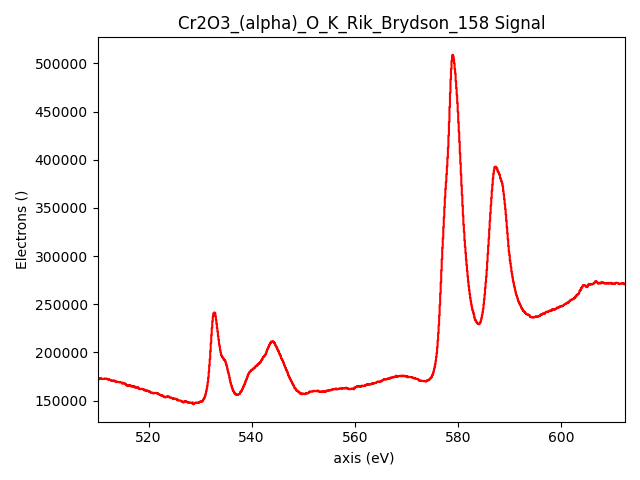

In [29]:
eels.plot()

## Plot both spectra
First, we plot both spectra without any scaling. Note how the EDS signal covers a larger energy region, whereas the EELS signal is barely visible as a vertical line in these axis limits.

<AxesSubplot:xlabel=' (eV)', ylabel='Intensity'>

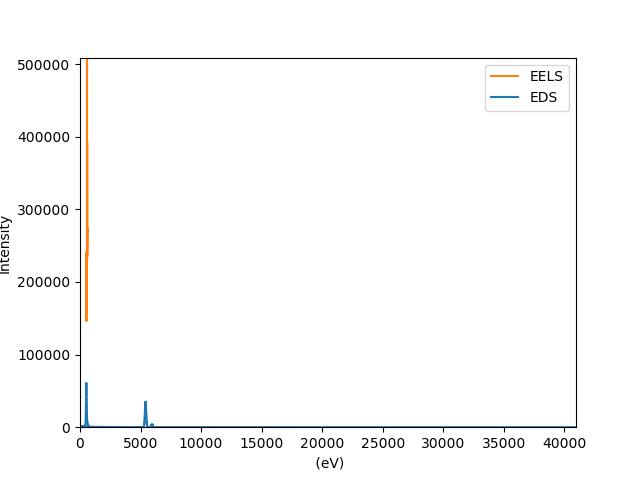

In [61]:
hs.plot.plot_spectra([eds, eels], drawstyle='steps-mid', legend=['EDS', 'EELS'])

## Plot both spectra with some scaling
Let's zoom into the low-energy region between 450 and 600 keV (Cr L and O K core losses) where both spectra have signal.  
We also normalize each spectrum by its maximum value to account for differences in total signal. This enables us to see qualitative differences between the spectra.

<AxesSubplot:xlabel=' (eV)', ylabel='Intensity'>

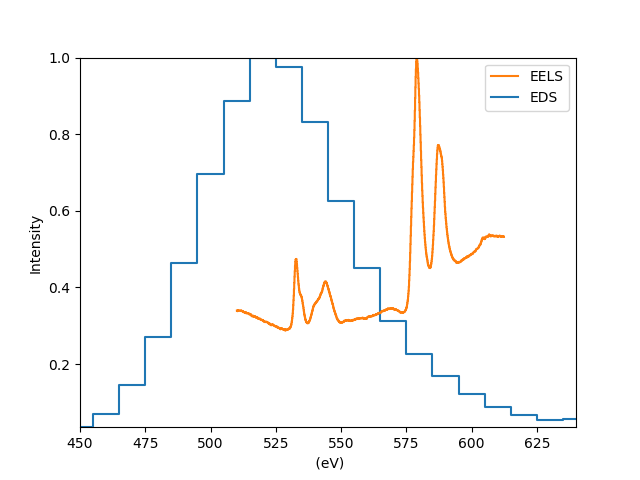

In [62]:
lims = (450.0, 650.0)

eds_plt = eds.isig[lims[0]:lims[1]].deepcopy()
eels_plt = eels.isig[lims[0]:lims[1]].deepcopy()

hs.plot.plot_spectra([eds_plt / np.max(eds_plt.data), eels_plt / np.max(eels_plt.data)], drawstyle='steps-mid', legend=['EDS', 'EELS'])

## Plot both spectra with some scaling, add some markers
Now we also add some markers for the edges and x-ray transition energies.

Text(519.9, 0.8, 'O K$\\alpha$')

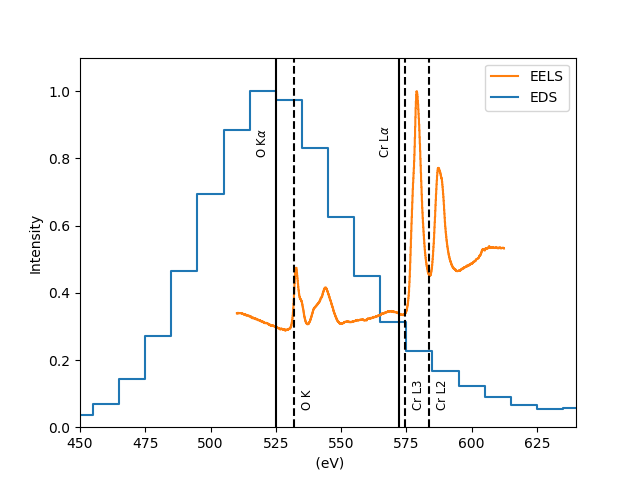

In [66]:
lims = (450.0, 650.0)

eds_plt = eds.isig[lims[0]:lims[1]].deepcopy()
eels_plt = eels.isig[lims[0]:lims[1]].deepcopy()

hs.plot.plot_spectra([eds_plt / np.max(eds_plt.data), eels_plt / np.max(eels_plt.data)], drawstyle='steps-mid', legend=['EDS', 'EELS'])

fig, ax = plt.gcf(), plt.gca()
ax.set_ylim((0,1.1))

### EELS edges ###
# Cr L
x = 574.5 # Cr L3
ax.axvline(x=x, c='k', ls='--'); ax.text(x=x+5, y=0.05, s='Cr L3', fontsize='small', rotation=90, ha='center', va='bottom')
x = 583.7 # Cr L2
ax.axvline(x=x, c='k', ls='--'); ax.text(x=x+5, y=0.05, s='Cr L2', fontsize='small', rotation=90, ha='center', va='bottom')
#x = 694.6 # Cr L1
#ax.axvline(x=x, c='k', ls='--'); ax.text(x=x+5, y=0.05, s='Cr L1', fontsize='small', rotation=90, ha='center', va='bottom')

# O K
x = 532.0 # O K
ax.axvline(x=x, c='k', ls='--'); ax.text(x=x+5, y=0.05, s='O K', fontsize='small', rotation=90, ha='center', va='bottom')

### EDS x-ray transitions ###

# Cr La
x = 572.2 # Cr La12
ax.axvline(x=x, c='k', ls='-'); ax.text(x=x-5, y=0.8, s=r'Cr L$\alpha$', fontsize='small', rotation=90, ha='center', va='bottom')


# O Ka
x = 524.9 # O Ka12
ax.axvline(x=x, c='k', ls='-'); ax.text(x=x-5, y=0.8, s=r'O K$\alpha$', fontsize='small', rotation=90, ha='center', va='bottom')